In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Input,Dense, SimpleRNN, Embedding, TimeDistributed, Bidirectional
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.models import Model

In [21]:
# preparing dataset

file1 = open("/content/chunking_train.txt", "r")
X = [] # contains the words
Y = [] # contains corresponding tags
x = []
y = []
for i in file1:
  s = i.split(" ")
  if s[0]!='.' and len(s)==3:
    x.append(s[0])
    y.append(s[2][:-1])
  else:
    X.append(x)
    Y.append(y)
    x = []
    y = []
# print(X)
print(Y)

[['B-NP', 'B-PP', 'B-NP', 'I-NP', 'B-VP', 'I-VP', 'I-VP', 'I-VP', 'I-VP', 'B-NP', 'I-NP', 'I-NP', 'B-SBAR', 'B-NP', 'I-NP', 'B-PP', 'B-NP', 'O', 'B-ADJP', 'B-PP', 'B-NP', 'B-NP', 'O', 'B-VP', 'I-VP', 'I-VP', 'B-NP', 'I-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'B-NP', 'I-NP', 'I-NP'], [], ['O', 'B-PP', 'B-NP', 'I-NP', 'B-NP', 'I-NP', 'B-NP', 'I-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'B-VP', 'I-VP', 'I-VP', 'I-VP', 'B-NP', 'I-NP', 'B-PP', 'B-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP'], [], ['O', 'B-NP', 'B-VP', 'B-NP', 'I-NP', 'B-PP', 'B-NP', 'B-VP', 'I-VP', 'I-VP', 'B-PP', 'B-NP', 'I-NP', 'B-NP', 'I-NP', 'B-VP', 'I-VP', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'B-NP', 'I-NP'], [], ['B-NP', 'B-VP', 'I-VP', 'B-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'B-VP', 'I-VP', 'I-VP', 'I-VP', 'B-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'I-NP', 'B-VP', 'I-VP', 'B-NP', 'I-NP', 'O', 'B-NP', 'O', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'B

In [22]:
unique_words = len(set([word.lower() for sentence in X for word in sentence]))
print(unique_words)

17257


In [23]:
# to find the different types of tags
total_tags   = len(set([word.lower() for sentence in Y for word in sentence]))
print(total_tags)

22


In [24]:
# code to vectorize X and Y

# encoding X
word_tokenizer = Tokenizer()              # instantiate tokeniser
word_tokenizer.fit_on_texts(X)            # fit tokeniser on data
# use the tokeniser to encode input sequence
X_encd = word_tokenizer.texts_to_sequences(X)  

# encoding Y
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encd = tag_tokenizer.texts_to_sequences(Y)

# look at first encoded data point

print('X: ', X_encd[0])
print('Y: ', Y_encd[0])

X:  [1535, 6, 2, 1636, 14, 1105, 183, 4, 206, 245, 1145, 4972, 70, 480, 565, 8, 460, 1, 251, 8, 1749, 2554, 1, 4170, 4, 597, 5, 1308, 1536, 20, 735, 7, 548, 9, 6325, 8934]
Y:  [2, 4, 2, 1, 3, 6, 6, 6, 6, 2, 1, 1, 8, 2, 1, 4, 2, 5, 9, 4, 2, 2, 5, 3, 6, 6, 2, 1, 1, 4, 2, 1, 1, 2, 1, 1]


In [25]:
# check length of longest sentence
longest = [len(seq) for seq in X_encd]
print("longest sentence: {}".format(max(longest)))

longest sentence: 77


In [26]:
# Pad Sequences

# we set a particular sentence length (max_length)
# sentences longer than max_length - truncated from the back
# sentences shorter than max_length - padded with zeros in front

max_length = 80

X_padded = pad_sequences(X_encd, maxlen= max_length, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encd, maxlen= max_length, padding="pre", truncating="post")
# print the first sequence
print(X_padded[0])
print(Y_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 1535    6    2 1636   14 1105  183    4  206  245 1145 4972
   70  480  565    8  460    1  251    8 1749 2554    1 4170    4  597
    5 1308 1536   20  735    7  548    9 6325 8934]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 4 2 1 3 6 6 6 6 2 1 1 8 2 1 4 2 5 9 4 2 2 5 3 6 6 2 1 1 4
 2 1 1 2 1 1]


In [27]:
# assign padded sequences to X and Y
X, Y = X_padded, Y_padded

In [28]:
# use Keras' to_categorical function to one-hot encode Y
Y = to_categorical(Y)
Y.shape

(17660, 80, 23)

In [29]:
# split entire data into training and testing sets
ts = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ts, random_state=5)

In [30]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train.shape

(15011, 80)

In [31]:
Y_train.shape

(15011, 80, 23)

In [32]:
# total number of tags
tot_tags = Y.shape[2]
tot_tags

23

In [37]:
rnn_model = Sequential()

# embedding layer
rnn_model.add(Embedding(input_dim     =  17258,         # vocab size
                        output_dim    =  80,          # length of each sentence
                        input_length  =  77,          # max_length
                        trainable     =  False          
))

# adding RNN layer
rnn_model.add(SimpleRNN(64, return_sequences=True ))
rnn_model.add(SimpleRNN(128, return_sequences=True , activation = 'sigmoid'))
rnn_model.add(SimpleRNN(256, return_sequences=True , activation = 'relu'))

# adding time distributed layer
rnn_model.add(TimeDistributed(Dense(tot_tags, activation='softmax')))

In [38]:
rnn_model.compile(loss = 'categorical_crossentropy', optimizer =  'adam', metrics   =  ['accuracy'])

In [39]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
118/118 [==============================] - 41s 333ms/step - loss: 0.7974 - accuracy: 0.8286 - val_loss: 0.3289 - val_accuracy: 0.8921
Epoch 2/10
118/118 [==============================] - 39s 330ms/step - loss: 0.3003 - accuracy: 0.8986 - val_loss: 0.2960 - val_accuracy: 0.8960
Epoch 3/10
118/118 [==============================] - 39s 330ms/step - loss: 0.2757 - accuracy: 0.9018 - val_loss: 0.2809 - val_accuracy: 0.8976
Epoch 4/10
118/118 [==============================] - 39s 331ms/step - loss: 0.2641 - accuracy: 0.9033 - val_loss: 0.2685 - val_accuracy: 0.9029
Epoch 5/10
118/118 [==============================] - 39s 331ms/step - loss: 0.2512 - accuracy: 0.9116 - val_loss: 0.2501 - val_accuracy: 0.9130
Epoch 6/10
118/118 [==============================] - 39s 328ms/step - loss: 0.2339 - accuracy: 0.9183 - val_loss: 0.2362 - val_accuracy: 0.9173
Epoch 7/10
118/118 [==============================] - 39s 330ms/step - loss: 0.2158 - accuracy: 0.9242 - val_loss: 0.2223 - val_ac

In [40]:
rnn_model.save('rnn_model.bin')

INFO:tensorflow:Assets written to: rnn_model.bin/assets


In [43]:
rnn_model.save_weights("rnn_chunking_model")

In [45]:
rnn_training.history['accuracy']

[0.8727200031280518,
 0.8986693024635315,
 0.9010650515556335,
 0.9049355387687683,
 0.9139522910118103,
 0.9194982051849365,
 0.9249217510223389,
 0.9307025074958801,
 0.933142364025116,
 0.93509840965271]

In [47]:
rnn_training.history['val_accuracy']

[0.8920961022377014,
 0.8959560394287109,
 0.8975698351860046,
 0.9028595685958862,
 0.9130001664161682,
 0.917346179485321,
 0.9244384765625,
 0.929671585559845,
 0.9317950010299683,
 0.9327387809753418]

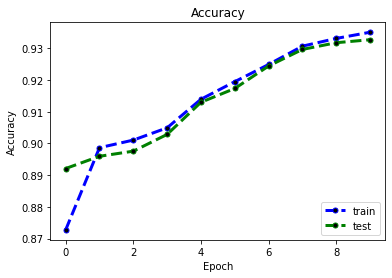

In [56]:
plt.plot(rnn_training.history['accuracy'], linestyle='dashed',color='blue',linewidth = 3, marker='o', markerfacecolor='black', markersize=5)
plt.plot(rnn_training.history['val_accuracy'], linestyle='dashed',color='green', linewidth = 3, marker='o', markerfacecolor='black', markersize=5)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [57]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: ",loss)
print("Accuracy: ", accuracy)

83/83 [==============================] - 3s 32ms/step - loss: 0.1993 - accuracy: 0.9327
Loss:  0.19933496415615082
Accuracy:  0.9327387809753418
